In [1]:
# 多维数组
import numpy as np
np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

![](http://ww2.sinaimg.cn/large/006tNc79gy1g54fuolp7qj30us09ugmj.jpg)

In [7]:
import numpy as np
persontype = np.dtype({
    'names':['name', 'age', 'weight'],
    'formats':['S32','i', 'f']})
a = np.array([("Zhang",32,75.5),("Wang",24,65.2)],
    dtype=persontype)
a.dtype

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [8]:
a[0]["name"]

b'Zhang'

In [9]:
b=a[:]["age"] # 或者a["age"]
b

array([32, 24], dtype=int32)

In [10]:
a.tofile("test.bin")

In [12]:
x = np.linspace(0, 2*np.pi, 10)
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [14]:
y = np.sin(x)
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [22]:
t=np.sin(x,x)
t

array([ 0.00000000e+00,  5.64171154e-01,  7.40064184e-01,  6.90196075e-01,
        3.29138324e-01, -3.29138324e-01, -6.90196075e-01, -7.40064184e-01,
       -5.64171154e-01, -2.44929360e-16])

In [23]:
id(t)==id(x)

True

sin函数的第二个参数也是x，那么它所做的事情就是对x中的每给值求正弦值，并且把结果保存到x中的 对应的位置中。此时函数的返回值仍然是整个计算的结果，只不过它就是x，因此两个变量的id是相同 的(变量t和变量x指向同一块内存区域)。

In [26]:
import time
import math
import numpy as np
x = [i * 0.001 for i in range(1000000)]
start = time.clock()
for i, t in enumerate(x):
    x[i] = math.sin(t)
print ("math.sin:", time.clock() - start)
x = [i * 0.001 for i in range(1000000)]
x = np.array(x)
start = time.clock()
np.sin(x,x)
print ("numpy.sin:", time.clock() - start)


math.sin: 0.26958200000000065
numpy.sin: 0.011201999999999934


在我的电脑上计算100万次正弦值，numpy.sin比math.sin快10倍多。这得利于numpy.sin在C语言级 别的循环计算。numpy.sin同样也支持对单个数值求正弦，例如:numpy.sin(0.5)。不过值得注意的 是，对单个数的计算math.sin则比numpy.sin快得多了，让我们看下面这个测试程序:

In [29]:
x = [i * 0.001 for i in range(1000000)]
start = time.clock()
for i, t in enumerate(x):
    x[i] = np.sin(t)
print ("numpy.sin loop:", time.clock() - start)


numpy.sin loop: 0.9909379999999999


![](http://ww4.sinaimg.cn/large/006tNc79gy1g54u89sb7fj31000eat9q.jpg)

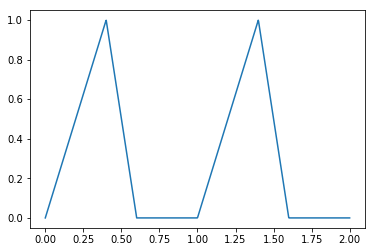

In [34]:
# ufunc 函数
def triangle_wave(x, c, c0, hc):
    x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算 
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r
x = np.linspace(0, 2, 1000)
y = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])
import pylab
%matplotlib inline
pylab.plot(x,y)

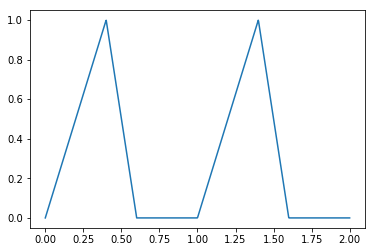

In [39]:
triangle_ufunc = np.frompyfunc( lambda x: triangle_wave(x, 0.6, 0.4, 1.0), 1, 1)
y2 = triangle_ufunc(x)
pylab.plot(x,y2)

In [41]:
def triangle_func(c, c0, hc):
    def trifunc(x):
        x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算 
        if x >= c: r = 0.0
        elif x < c0: r = x / c0 * hc
        else: r = (c-x) / (c-c0) * hc
        return r
# 用trifunc函数创建一个ufunc函数，可以直接对数组进行计算, 不过通过此函数 # 计算得到的是一个Object数组，需要进行类型转换
    return np.frompyfunc(trifunc, 1, 1)

y3 = triangle_func(0.6, 0.4, 1.0)(x)
pylab.plot_date(y3)

TypeError: plot_date() missing 1 required positional argument: 'y'